In [86]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [87]:
df = pd.read_csv("/content/rides_data.csv")

In [88]:
df.shape

(50000, 13)

In [89]:
df.sample(5)

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method
35754,cab economy,2024-07-24,06:49:21.735376,completed,HSR Layout Layout,Kalyan Nagar Run,10,RD0053357379800750,12.28,573.91,30.47,604.38,Paytm
11983,bike,2024-07-06,10:15:39.611537,completed,Rajajinagar Cut,Kothanur Alcove,63,RD7496449195330947,7.10,459.16,33.31,492.47,GPay
31769,bike,2024-07-22,15:46:04.722843,cancelled,KR Puram Cross,Jakkur Summit,100,RD8475129656508449,15.97,NaN,NaN,NaN,NaN
10912,auto,2024-08-03,04:42:01.611537,completed,Hosur Road Zone,Horamavu Cove,55,RD9787917256274105,47.87,657.54,3.31,660.85,GPay
8148,auto,2024-08-12,20:26:40.588935,completed,Mahadevapura Close,Marathahalli Mews,98,RD0938747728456054,27.43,699.02,34.37,733.39,Amazon Pay


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   services        50000 non-null  object 
 1   date            50000 non-null  object 
 2   time            50000 non-null  object 
 3   ride_status     50000 non-null  object 
 4   source          50000 non-null  object 
 5   destination     50000 non-null  object 
 6   duration        50000 non-null  int64  
 7   ride_id         50000 non-null  object 
 8   distance        50000 non-null  float64
 9   ride_charge     44964 non-null  float64
 10  misc_charge     44964 non-null  float64
 11  total_fare      44964 non-null  float64
 12  payment_method  44964 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.0+ MB


In [91]:
df.isnull().sum()

,0
services,0
date,0
time,0
ride_status,0
source,0
destination,0
duration,0
ride_id,0
distance,0
ride_charge,5036


In [92]:
mean_ride_charge = df['ride_charge'].mean()
df['ride_charge'].fillna(mean_ride_charge, inplace=True)
df['ride_charge'].isnull().sum()


<ipython-input-92-87920817c168>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ride_charge'].fillna(mean_ride_charge, inplace=True)


0

In [93]:
mean_misc_charge = df['misc_charge'].mean()
df['misc_charge'].fillna(mean_misc_charge, inplace=True)
df['misc_charge'].isnull().sum()

<ipython-input-93-25e0fd29aed4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['misc_charge'].fillna(mean_misc_charge, inplace=True)


0

In [94]:
mean_total_fare = df['total_fare'].mean()
df['total_fare'].fillna(mean_total_fare, inplace=True)
df['total_fare'].isnull().sum()

<ipython-input-94-3bf9fd707097>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_fare'].fillna(mean_total_fare, inplace=True)


0

In [95]:
most_frequent_payment_method = df['payment_method'].mode()[0]
df['payment_method'].fillna(most_frequent_payment_method, inplace=True)
df['payment_method'].isnull().sum()


<ipython-input-95-8f4047bdb0a8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment_method'].fillna(most_frequent_payment_method, inplace=True)


0

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   services        50000 non-null  object 
 1   date            50000 non-null  object 
 2   time            50000 non-null  object 
 3   ride_status     50000 non-null  object 
 4   source          50000 non-null  object 
 5   destination     50000 non-null  object 
 6   duration        50000 non-null  int64  
 7   ride_id         50000 non-null  object 
 8   distance        50000 non-null  float64
 9   ride_charge     50000 non-null  float64
 10  misc_charge     50000 non-null  float64
 11  total_fare      50000 non-null  float64
 12  payment_method  50000 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.0+ MB


In [97]:
df.describe()

,duration,distance,ride_charge,misc_charge,total_fare
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,64.320100,25.528243,522.428805,24.964289,547.393093
std,31.852336,14.177136,260.523433,13.711904,260.873151
min,10.000000,1.000000,50.030000,0.000000,50.580000
25%,37.000000,13.260000,309.957500,13.790000,334.767500
50%,64.000000,25.460000,522.428805,24.964289,547.393093
75%,92.000000,37.860000,733.267500,36.060000,758.415000
max,119.000000,50.000000,999.960000,50.000000,1048.800000


In [98]:
df.duplicated().sum()

0

<Axes: xlabel='count', ylabel='services'>

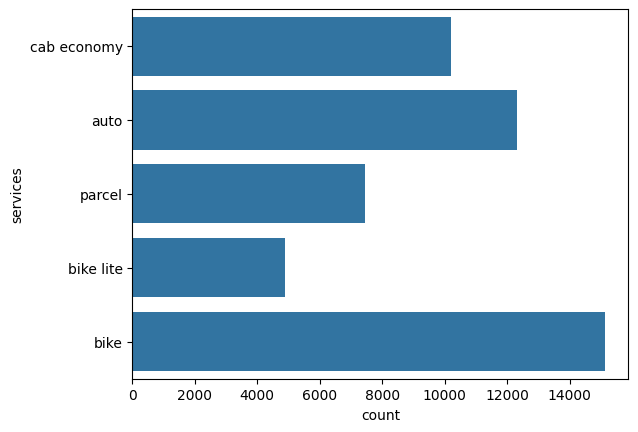

In [99]:
sns.countplot(df['services'])

The bike service is the most popular, followed by auto, while parcel is the least used. This suggests a higher preference for two-wheeler services in the dataset.

<Axes: ylabel='count'>

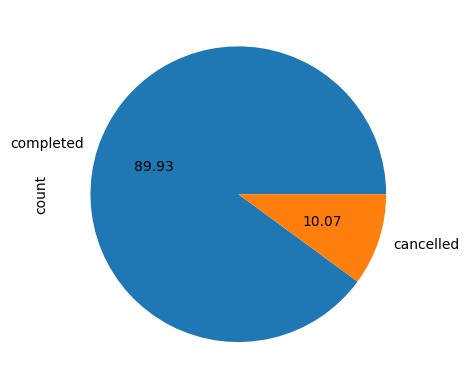

In [100]:
df['ride_status'].value_counts().plot(kind='pie', autopct='%.2f')

Approximately 89.93% of the rides are completed, while 10.07% are canceled. This indicates a high success rate of ride completion with a small percentage of cancellations.

<Axes: xlabel='services', ylabel='count'>

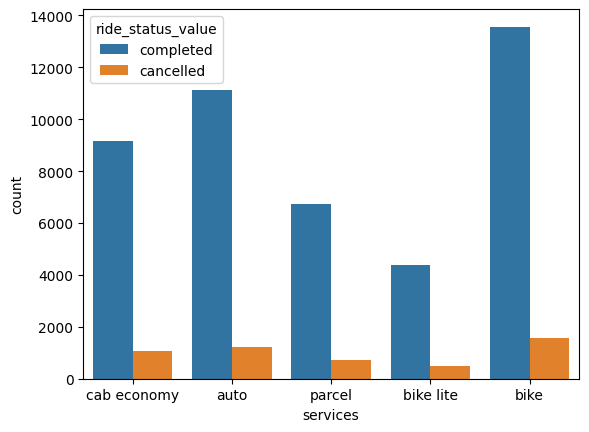

In [101]:
df_melted = df.melt(id_vars=['services'], value_vars=['ride_status'], var_name='ride_status_type', value_name='ride_status_value')
sns.countplot(x='services', hue='ride_status_value', data=df_melted)


**Insight**: Bike services have the highest completion rate but also a relatively higher cancellation rate compared to other services.

**Reasons**: This could be due to weather conditions, passenger safety concerns, or driver unavailability, which affect bikes more than enclosed vehicles like cabs or autos.

<Axes: ylabel='count'>

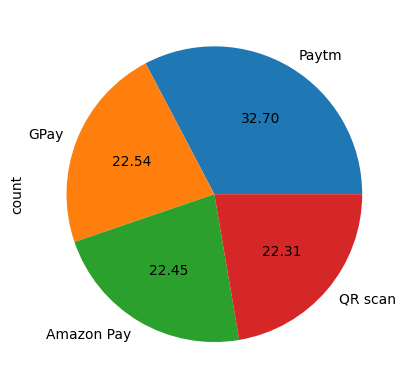

In [102]:
df['payment_method'].value_counts().plot(kind='pie', autopct='%.2f')

This indicates that while Paytm dominates, other methods also hold significant shares, suggesting a diverse preference for digital payment options.

In [103]:
df['date'] = pd.to_datetime(df['date'])
df['date_month_no'] = df['date'].dt.month
df.head()


,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method,date_month_no
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.830000,31.510000,796.340000,Amazon Pay,7
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.830000,49.520000,364.350000,Paytm,7
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,522.428805,24.964289,547.393093,Paytm,7
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.730000,15.840000,500.570000,QR scan,6
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.500000,14.130000,677.630000,Amazon Pay,7


In [104]:
df['date_month_name'] = df['date'].dt.month_name()

df.head()

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method,date_month_no,date_month_name
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.830000,31.510000,796.340000,Amazon Pay,7,July
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.830000,49.520000,364.350000,Paytm,7,July
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,522.428805,24.964289,547.393093,Paytm,7,July
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.730000,15.840000,500.570000,QR scan,6,June
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.500000,14.130000,677.630000,Amazon Pay,7,July


In [105]:
df['date_month_name'].value_counts()

,count
date_month_name,
July,25552
August,13171
June,11277


<Axes: xlabel='ride_status', ylabel='date_month_name'>

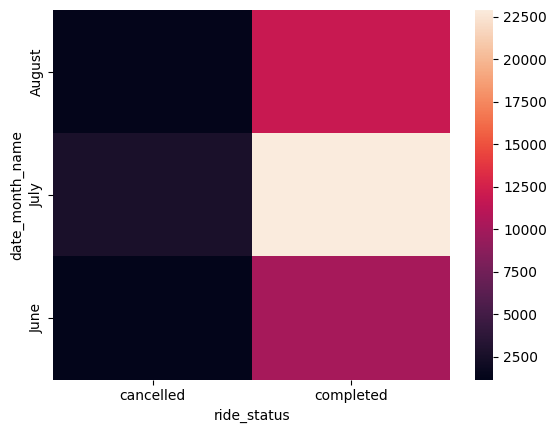

In [106]:
sns.heatmap(pd.crosstab(df['date_month_name'], df['ride_status']))

The July spike in completions suggests a peak in activity, possibly due to increased travel or seasonal factors.

<Axes: xlabel='services', ylabel='date_month_name'>

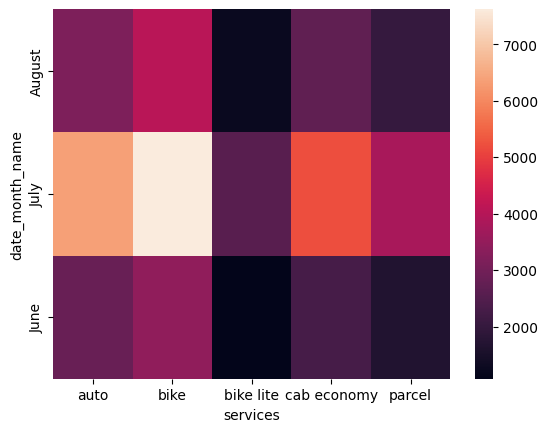

In [107]:
sns.heatmap(pd.crosstab(df['date_month_name'], df['services']))

The heatmap indicates that auto and bike lite services peak in July, possibly due to increased demand during mid-year travel or events. Bike services are more consistent across June and August, likely reflecting regular commuting patterns. Parcel services see a July spike, possibly linked to seasonal shopping or deliveries.

In [108]:
df['destination'].value_counts()

,count
destination,
Gottigere Landing,23
Gottigere Square,20
HRBR Layout Drive,17
Kudlu Square,17
Harohalli Landing,16
...,...
Doddanekundi Works,1
Jayanagar Pass,1
Kudlu Fields,1


The most frequented destinations are Gottigere Landing (23 rides) and Gottigere Square (20 rides), indicating a high volume of rides to these locations.

<Axes: xlabel='services', ylabel='count'>

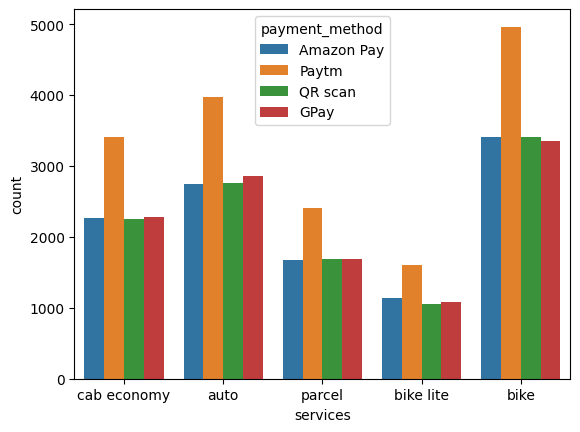

In [109]:
sns.countplot(x='services', hue='payment_method', data=df)


Paytm is the most popular payment method across all services, particularly in the auto and bike categories. Other methods like Amazon Pay, QR Scan, and GPay have similar but lower usage, with GPay being the least favored overall.

In [110]:
import pandas as pd

def get_time_of_day(time):
  if 6 <= time.hour < 10:
    return 'Morning'
  elif 10 <= time.hour < 17:
    return 'Afternoon'
  else:
    return 'Evening'


df['time_of_day'] = pd.to_datetime(df['time']).dt.time.apply(get_time_of_day)


<ipython-input-110-5e058b6829da>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_of_day'] = pd.to_datetime(df['time']).dt.time.apply(get_time_of_day)


In [111]:
df.head(5)

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method,date_month_no,date_month_name,time_of_day
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.830000,31.510000,796.340000,Amazon Pay,7,July,Morning
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.830000,49.520000,364.350000,Paytm,7,July,Evening
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,522.428805,24.964289,547.393093,Paytm,7,July,Afternoon
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.730000,15.840000,500.570000,QR scan,6,June,Morning
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.500000,14.130000,677.630000,Amazon Pay,7,July,Evening


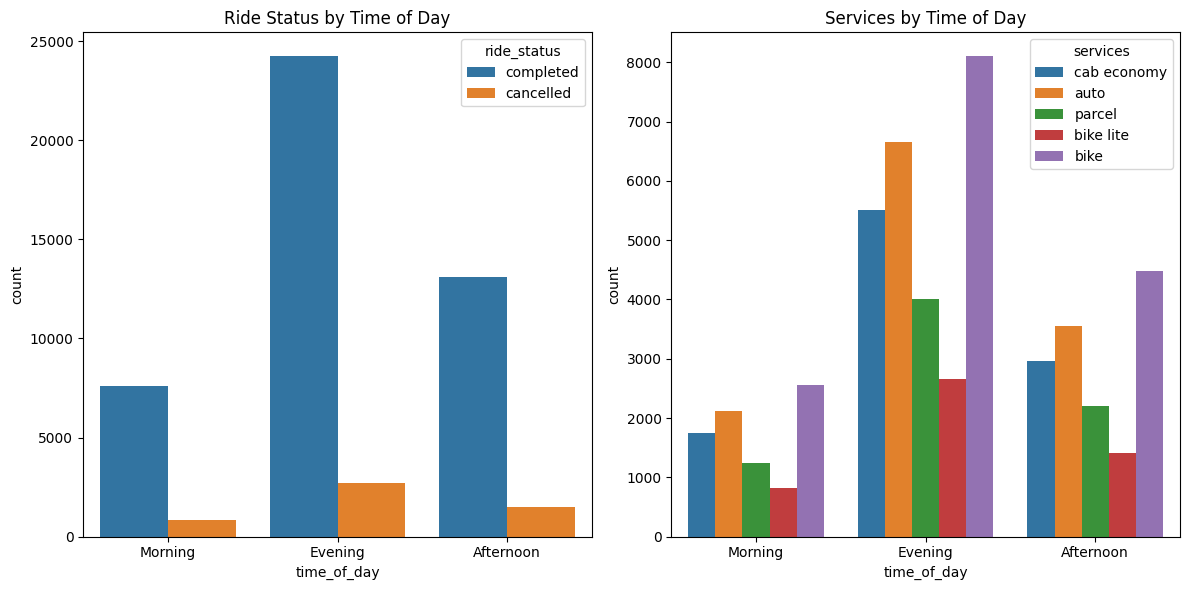

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.countplot(x='time_of_day', hue='ride_status', data=df)
plt.title('Ride Status by Time of Day')

plt.subplot(1, 2, 2)
sns.countplot(x='time_of_day', hue='services', data=df)
plt.title('Services by Time of Day')

plt.tight_layout()
plt.show()
